In [2]:
import ipywidgets as widgets
from IPython.display import display, clear_output

button = widgets.Button(description="Click Me!")
output = widgets.Output(layout={'border': '1px solid black'})

def on_button_clicked(b):
    with output:
        print("Button clicked.")

button.on_click(on_button_clicked)
display(button, output)

Button(description='Click Me!', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [3]:
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()
ui = widgets.HBox([a, b, c])
def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

Output()

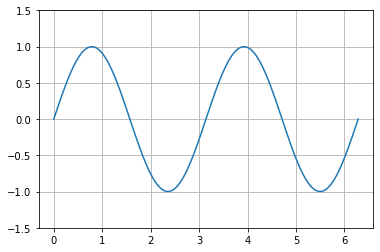

IntSlider(value=1, continuous_update=False, description='$\\omega$', max=10)

In [53]:
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(0, 2 * np.pi, 100)

#prepare
fig, ax = plt.subplots(figsize=(6, 4))
ax.grid(True)  
ax.set_ylim([-1.5, 1.5])
hdisplay = display("", display_id=True)
plt.close(fig) 
   
    
def update(change):
    global ax,fig,first, hdisplay
    if not ax.lines:
           ax.plot(x, np.sin(x))
    else:  
           ax.lines[0].set_ydata(np.sin(change.new * x))
    hdisplay.update(fig)       
     
int_slider = widgets.IntSlider(
    value=1, 
    min=0, max=10, step=1,
    description='$\omega$',
    continuous_update=False
)

int_slider.observe(update, 'value')
update(0)
int_slider


In [48]:
fig,ax=0,0
x = np.linspace(0, 2 * np.pi, 100)  
    
def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
 
@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01), e=True)
def update(w = 1.0, amp=1, phi=0, e=True):
    """Remove old lines from plot and plot new one"""
    global ax, fig
    if not ax:
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.set_ylim([-4, 4])
        ax.grid(True)
        ax.plot(x, my_sine(x, 1, 1, 0.01), color='C0') 
    else:  
        [l.remove() for l in ax.lines]
        ax.plot(x, my_sine(x, w, amp, phi), color='C0')
        display(ax.figure)

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…